## **Importing the Libraries**

In [1]:
# Loading the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the files**

In [10]:
# Loading the data
train_features=pd.read_csv("/content/dengue_features_train.csv")
train_labels=pd.read_csv("/content/dengue_labels_train.csv")
test=pd.read_csv("/content/dengue_features_test.csv")

In [3]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [11]:
# merging features and labels into a single data-frame
df=pd.merge(train_features,train_labels,on=['city','year','weekofyear'])

In [12]:
train_iq=df[df['city']=='iq']
test_iq=test[test['city']=='iq']

# **Handling Missing Data and Outliers**

In [7]:
print("Train Data Info")
print(train_iq.info())
print(" ")
print("Test Data Info")
print(test_iq.info())

Train Data Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 936 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   520 non-null    object 
 1   year                                   520 non-null    int64  
 2   weekofyear                             520 non-null    int64  
 3   week_start_date                        520 non-null    object 
 4   ndvi_ne                                517 non-null    float64
 5   ndvi_nw                                517 non-null    float64
 6   ndvi_se                                517 non-null    float64
 7   ndvi_sw                                517 non-null    float64
 8   precipitation_amt_mm                   516 non-null    float64
 9   reanalysis_air_temp_k                  516 non-null    float64
 10  reanalysis_avg_temp_k                  516 non-null    

In [8]:
print("Incorrect Values of weekofyear in train data:-")
print(train_iq[train_iq['weekofyear']>52])
print("Incorrect Values of weekofyear in test data:-")
print(test_iq[test_iq['weekofyear']>52])

Incorrect Values of weekofyear in train data:-
     city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
1170   iq  2005          53  ...                NaN                NaN            9
1430   iq  2010          53  ...                NaN                NaN            0

[2 rows x 25 columns]
Incorrect Values of weekofyear in test data:-
Empty DataFrame
Columns: [city, year, weekofyear, week_start_date, ndvi_ne, ndvi_nw, ndvi_se, ndvi_sw, precipitation_amt_mm, reanalysis_air_temp_k, reanalysis_avg_temp_k, reanalysis_dew_point_temp_k, reanalysis_max_air_temp_k, reanalysis_min_air_temp_k, reanalysis_precip_amt_kg_per_m2, reanalysis_relative_humidity_percent, reanalysis_sat_precip_amt_mm, reanalysis_specific_humidity_g_per_kg, reanalysis_tdtr_k, station_avg_temp_c, station_diur_temp_rng_c, station_max_temp_c, station_min_temp_c, station_precip_mm]
Index: []


In [13]:
# Since reanalysis columns are in Kelvin station columns are in degree converting all reanalysis values to celsius scsle
train_iq['reanalysis_avg_temp_k'] = train_iq['reanalysis_avg_temp_k'] - 273.15
train_iq['reanalysis_air_temp_k'] = train_iq['reanalysis_air_temp_k'] - 273.15
train_iq['reanalysis_dew_point_temp_k'] = train_iq['reanalysis_dew_point_temp_k'] - 273.15
train_iq['reanalysis_max_air_temp_k'] = train_iq['reanalysis_max_air_temp_k'] - 273.15
train_iq['reanalysis_min_air_temp_k'] = train_iq['reanalysis_min_air_temp_k'] - 273.15

test_iq['reanalysis_avg_temp_k'] = test_iq['reanalysis_avg_temp_k'] - 273.15
test_iq['reanalysis_air_temp_k'] = test_iq['reanalysis_air_temp_k'] - 273.15
test_iq['reanalysis_dew_point_temp_k'] = test_iq['reanalysis_dew_point_temp_k'] - 273.15
test_iq['reanalysis_max_air_temp_k'] = test_iq['reanalysis_max_air_temp_k'] - 273.15
test_iq['reanalysis_min_air_temp_k'] = test_iq['reanalysis_min_air_temp_k'] - 273.15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [14]:
train_iq['month']=pd.to_datetime(train_iq['week_start_date']).apply(lambda x: x.month)
train_iq.drop("week_start_date",1,inplace=True)
test_iq['month']=pd.to_datetime(test_iq['week_start_date']).apply(lambda x: x.month)
test_iq.drop("week_start_date",1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [15]:
# Missing values
print("Train Data")
print(train_iq.isnull().sum()/len(train_iq)*100)
print(" ")
print("Test Data")
print(test_iq.isnull().sum()/len(test_iq)*100)

Train Data
city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
ndvi_ne                                  0.576923
ndvi_nw                                  0.576923
ndvi_se                                  0.576923
ndvi_sw                                  0.576923
precipitation_amt_mm                     0.769231
reanalysis_air_temp_k                    0.769231
reanalysis_avg_temp_k                    0.769231
reanalysis_dew_point_temp_k              0.769231
reanalysis_max_air_temp_k                0.769231
reanalysis_min_air_temp_k                0.769231
reanalysis_precip_amt_kg_per_m2          0.769231
reanalysis_relative_humidity_percent     0.769231
reanalysis_sat_precip_amt_mm             0.769231
reanalysis_specific_humidity_g_per_kg    0.769231
reanalysis_tdtr_k                        0.769231
station_avg_temp_c                       7.115385
station_diur_temp_rng_c                

In [16]:
# we can use ffill to impute NAN values

### Checking for Seasonality in data

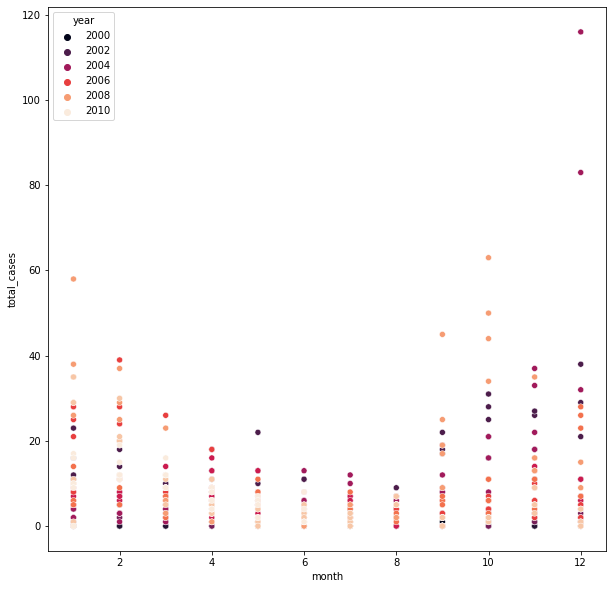

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train_iq['month'],y=train_iq['total_cases'],hue=train_iq['year'],palette='rocket')


In [18]:
# There is Seasonality
train_iq['spring']=np.where(((train_iq['month']>=3) & (train_iq['month']<6)),1,0)
train_iq['summer']=np.where(((train_iq['month']>=6) &(train_iq['month']<9)),1,0)
train_iq['fall']=np.where(((train_iq['month']>=9) & (train_iq['month']<=11)),1,0)
train_iq['winter']=np.where(((train_iq['month']==12)|(train_iq['month']==1)|(train_iq['month']==2)),1,0)

test_iq['spring']=np.where(((test_iq['month']>=3) & (test_iq['month']<6)),1,0)
test_iq['summer']=np.where(((test_iq['month']>=6) &(test_iq['month']<9)),1,0)
test_iq['fall']=np.where(((test_iq['month']>=9) & (test_iq['month']<=11)),1,0)
test_iq['winter']=np.where(((test_iq['month']==12)|(test_iq['month']==1)|(test_iq['month']==2)),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [20]:
train_iq[['total_cases','spring','summer','fall','winter']].corr()

,total_cases,spring,summer,fall,winter
total_cases,1.000000,-0.088574,-0.235166,0.059669,0.264071
spring,-0.088574,1.000000,-0.333333,-0.333333,-0.333333
summer,-0.235166,-0.333333,1.000000,-0.333333,-0.333333
fall,0.059669,-0.333333,-0.333333,1.000000,-0.333333
winter,0.264071,-0.333333,-0.333333,-0.333333,1.000000


# **Analysing Temperature Columns**

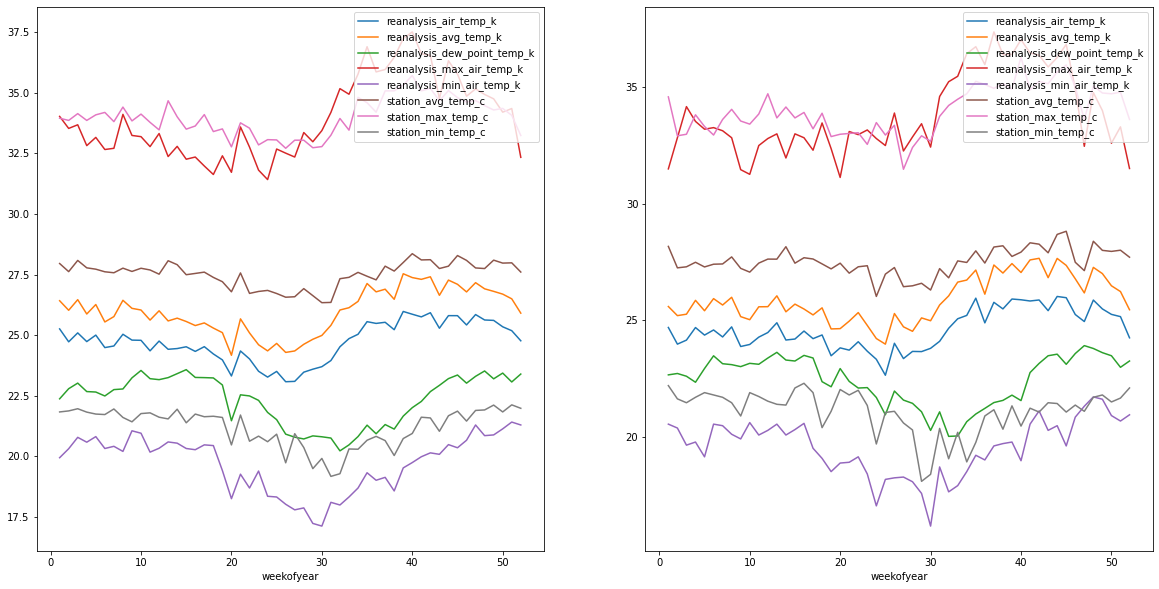

In [21]:
temperatures=['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
          'station_avg_temp_c','station_max_temp_c','station_min_temp_c']
fig,ax=plt.subplots(1,2,figsize=(20,10))
fig=train_iq.groupby('weekofyear')[temperatures].mean().plot(ax=ax[0])
fig.legend(loc='upper right')
fig=test_iq.groupby('weekofyear')[temperatures].mean().plot(ax=ax[1])
fig.legend(loc='upper right')

In [23]:
print(train_iq[temperatures].var())

reanalysis_air_temp_k            1.371234
reanalysis_avg_temp_k            1.774419
reanalysis_dew_point_temp_k      2.008539
reanalysis_max_air_temp_k        5.678595
reanalysis_min_air_temp_k        2.765799
station_avg_temp_c               0.849657
station_max_temp_c               1.756316
station_min_temp_c               1.588423
total_cases                    115.895524
dtype: float64


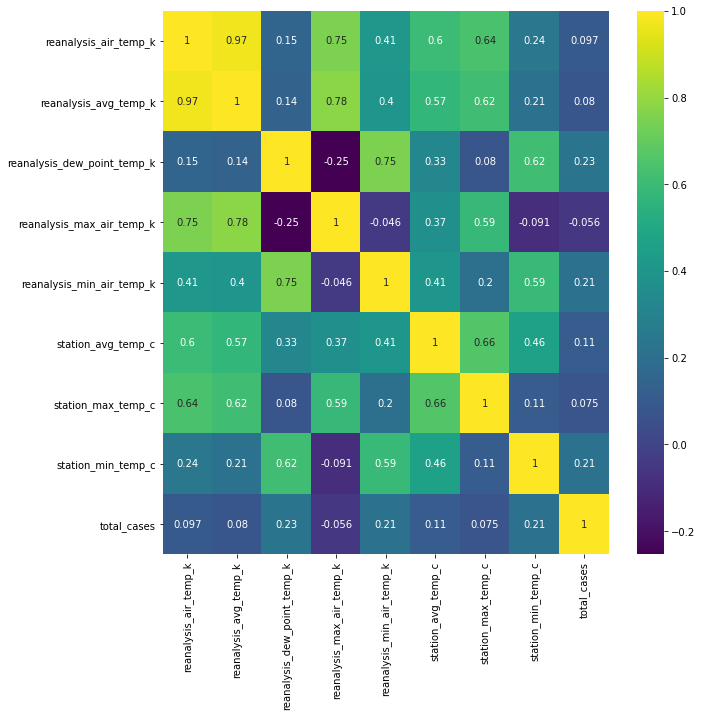

In [22]:
# Examining all temperature cols
temperatures=['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
          'station_avg_temp_c','station_max_temp_c','station_min_temp_c','total_cases']
plt.figure(figsize=(10,10))
sns.heatmap(train_iq[temperatures].corr(),annot=True,cmap='viridis')

**Conclusions from above Analysis:-**


1.   reanalysis_air_temp_k and reanalysis_avg_temp_k are highly correlated as in city SJ.
2.   However other features are not that much correlated as in case of SJ.
3.   We can see that reanalysis_max_temp_k as high variance as compared to other features so it will be a good feature.



## **Analysing Diur Temperature range and Precipitation Columns**

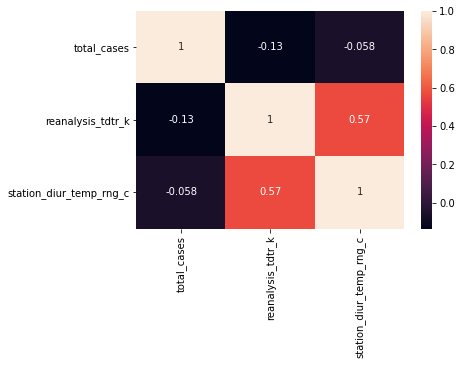

In [27]:
sns.heatmap(train_iq[['total_cases','reanalysis_tdtr_k','station_diur_temp_rng_c']].corr(),annot=True)

In [29]:
diur_temperatures=['reanalysis_tdtr_k','station_diur_temp_rng_c']
print(train_iq[diur_temperatures].var())
print(test_iq[diur_temperatures].var())

reanalysis_tdtr_k          5.995273
station_diur_temp_rng_c    2.357748
dtype: float64
reanalysis_tdtr_k          4.615909
station_diur_temp_rng_c    2.294739
dtype: float64


reanalysis_tdtr_k is a good feature since it is correlation coeficent with total_cases is high and has high variance.

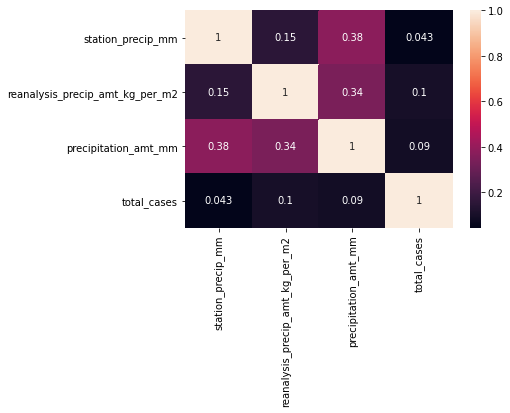

In [32]:
sns.heatmap(train_iq[['station_precip_mm','reanalysis_precip_amt_kg_per_m2','precipitation_amt_mm','total_cases']].corr(),annot=True)

In [34]:
train_iq[['station_precip_mm','reanalysis_precip_amt_kg_per_m2','precipitation_amt_mm']].var()

station_precip_mm                  4000.051232
reanalysis_precip_amt_kg_per_m2    2528.737597
precipitation_amt_mm               1240.377599
dtype: float64

**Conclusions from above Analysis:-**



1.   reanalysis_tdtr_k is a good feature since it has egreather then 0.1 correlation coefficent with total_cases and also high varianc.
2.  We can consider reanalysis_precip_amt_kg_per_m2 since it has greather then 0.1 correlation coefficent with total_cases and also good variance.



# **Analysis of Humidity Columns**

In [35]:
train_iq[['total_cases','reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg']].corr()

,total_cases,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
total_cases,1.000000,0.130083,0.236476
reanalysis_relative_humidity_percent,0.130083,1.000000,0.722938
reanalysis_specific_humidity_g_per_kg,0.236476,0.722938,1.000000


In [36]:
train_iq[['reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg']].var()

reanalysis_relative_humidity_percent     57.515374
reanalysis_specific_humidity_g_per_kg     2.090248
dtype: float64

Both are good.

# **Analysis of Vegetation Columns**

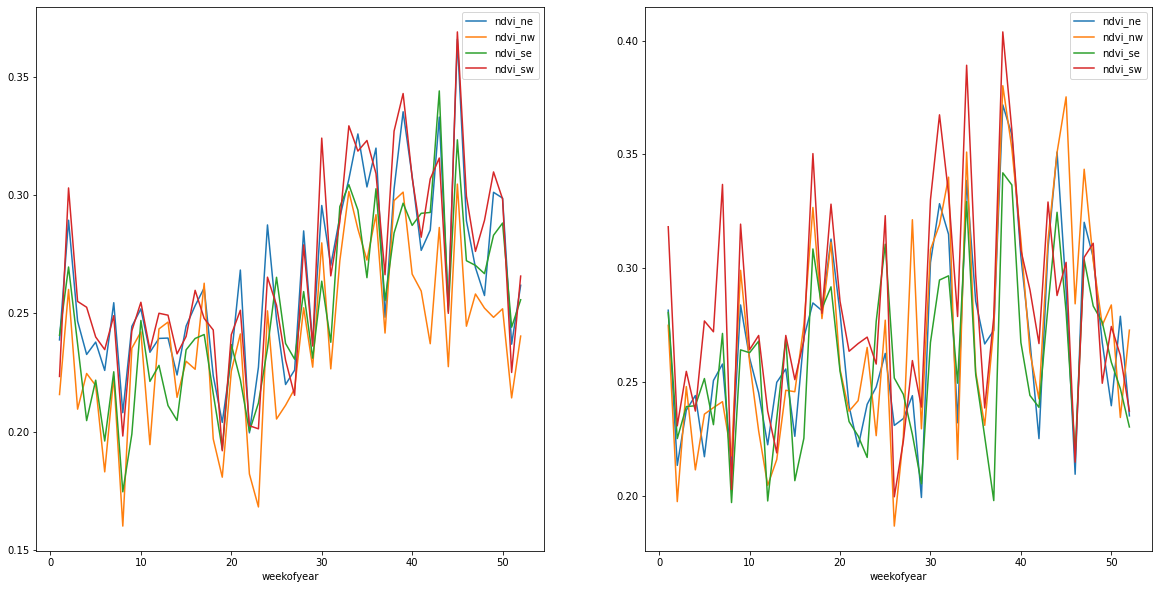

In [37]:
vegetation_columns=['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw']
fig,ax=plt.subplots(1,2,figsize=(20,10))
fig=train_iq.groupby('weekofyear')[vegetation_columns].mean().plot(ax=ax[0])
fig.legend(loc='upper right')
fig=test_iq.groupby('weekofyear')[vegetation_columns].mean().plot(ax=ax[1])
fig.legend(loc='upper right')

In [39]:
train_iq[vegetation_columns].var()

ndvi_ne    0.006621
ndvi_nw    0.005891
ndvi_se    0.005984
ndvi_sw    0.007455
dtype: float64

In [40]:
train_iq[vegetation_columns+['total_cases']].corr()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,total_cases
ndvi_ne,1.000000,0.764407,0.767745,0.842784,0.020215
ndvi_nw,0.764407,1.000000,0.644194,0.764829,-0.009586
ndvi_se,0.767745,0.644194,1.000000,0.714577,-0.041067
ndvi_sw,0.842784,0.764829,0.714577,1.000000,0.032999
total_cases,0.020215,-0.009586,-0.041067,0.032999,1.000000


Here the all values are moderately correlated